## MINIPROJETO 1

### Itens 1 a 3 - Resolução:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import beta, norm, probplot
import pylab 

In [2]:
#Leitura da base já em formato de DataFrame e extensão .csv
Enem = pd.read_csv('Resumido.csv', sep=';')

In [3]:
Enem.head()

,Nome,Estado,NAlunos,NotaPT,NotaRed,NotaMat,NotaCH,NotaCN
0,Escola1,AC,11,447.94,376.36,434.45,498.27,449.08
1,Escola2,AC,79,468.86,377.97,438.26,506.73,463.18
2,Escola3,AC,29,451.54,406.21,398.72,492.44,439.33
3,Escola4,AC,59,461.90,360.68,408.17,507.98,449.46
4,Escola5,AC,48,466.49,440.42,420.99,493.86,455.47


In [4]:
Enem.describe()

,NAlunos,NotaPT,NotaRed,NotaMat,NotaCH,NotaCN
count,15640.000000,15640.000000,15640.00000,15640.000000,15640.000000,15640.000000
mean,62.900895,520.016193,515.40177,495.663815,555.976635,498.740652
std,61.752721,39.468603,99.01672,69.613814,42.619019,46.846699
min,10.000000,401.140000,186.67000,374.310000,430.630000,401.460000
25%,23.000000,491.585000,446.01500,444.497500,525.000000,464.637500
50%,42.000000,515.365000,505.51500,475.730000,548.795000,485.340000
75%,81.000000,547.980000,585.88000,533.115000,585.030000,526.820000
max,808.000000,661.110000,886.56000,868.380000,722.610000,734.820000


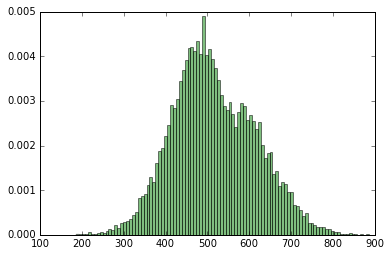

In [5]:
plt.hist((Enem.NotaRed), 100, normed=1, facecolor='green', alpha=0.5)
plt.show()

### Itens 4 a 6 - Resolução:

###### Dados encontrados por observação e metodo empirico/análitico

In [6]:
NotaRedMed = Enem.NotaRed.mean()
NotaRedDP = Enem.NotaRed.std()
print(NotaRedMed, NotaRedDP)

515.4017704603581 99.01671971257163


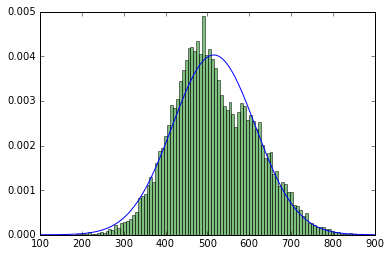

In [7]:
Sigma1 = NotaRedDP
Sigma2 = NotaRedDP
Mi = NotaRedMed
def Normal(x):
    A = (1/(Sigma1*(math.sqrt(2*math.pi)))) 
    B = math.e ** (-((x-Mi)**2)/(2*(Sigma2**2)))
    return  A * B

La = []
Lb = []

for i in range(100, 900):
    La.append(Normal(i))
    Lb.append(i)
    
plt.plot(Lb, La)
plt.hist((Enem.NotaRed), 100, normed=1, facecolor='green', alpha=0.5)
plt.show()

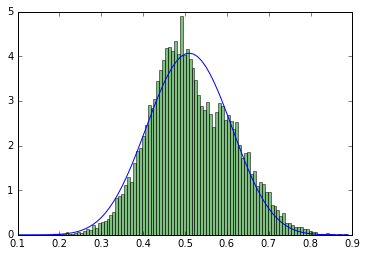

In [8]:
a, b = 13.5, 13
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

x = np.arange(0.1,0.9,0.01)
plt.plot(x, beta.pdf(x, a, b), label='beta pdf')
plt.hist((Enem.NotaRed/1000), 100, normed=1, facecolor='green', alpha=0.5)
plt.show()

In [9]:
Normal = norm.fit(Enem.NotaRed) 
print(Normal)

(515.40177046035808, 99.013554165816387)


###### Dados utilizando o metodo "Fit"

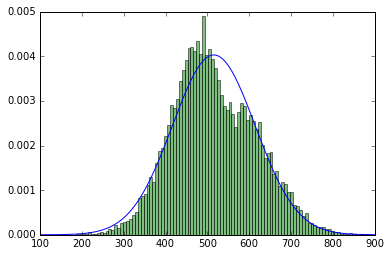

In [10]:
mean, var, skew, kurt = norm.stats(moments='mvsk')

x = np.arange(100, 900,0.01)
plt.plot(x, norm.pdf(x,  Normal[0],  Normal[1]), label='norm pdf')
plt.hist((Enem.NotaRed), 100, normed=1, facecolor='green', alpha=0.5)
plt.show()

In [11]:
Beta = beta.fit(Enem.NotaRed)
print(Beta)

(13.912331175171307, 28.076932311231353, 58.827703556602131, 1378.0286051539288)


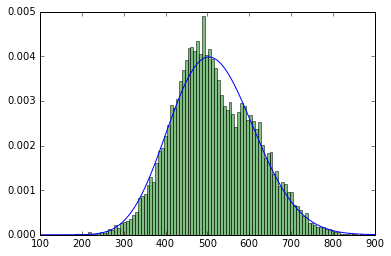

In [12]:
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

x = np.arange(100, 900,0.01)
plt.plot(x, beta.pdf(x, Beta[0], Beta[1], Beta[2], Beta[3]), label='beta pdf')
plt.hist((Enem.NotaRed), 100, normed=1, facecolor='green', alpha=0.5)
plt.show()

### Itens 7 a 9 - Resolução:

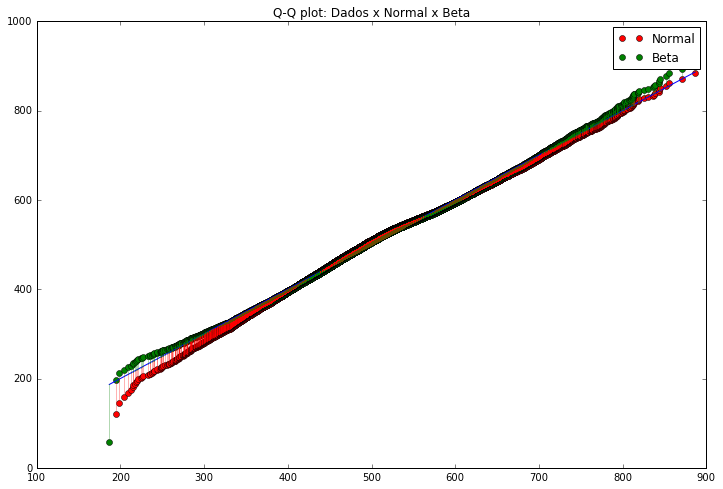

In [13]:
# dados ordenados e quantis teóricos - QQplot
tempos = pd.Series(data=sorted(Enem.NotaRed))
# Calcula a frequência relativa acumulada com os dados vindos dos arquivos
fra = [] # frequencia relativa acumulada
for i in range(len(tempos)):
    acc = (i - 0.5) / len(tempos)
    if acc < 0:
        acc = 0
    fra.append(acc)

# Convertemos fra em uma Series do Pandas
fra = pd.Series(data=fra)

# Gera os valores dos quantis teóricos para as distribuições analisadas
q_norm = norm.ppf(fra, Normal[0],  Normal[1]) # quantis teóricos da exponencial
q_beta = beta.ppf(fra, Beta[0], Beta[1], Beta[2], Beta[3])


fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x Normal x Beta")

norm_plot, = plt.plot(tempos, q_norm, 'o', color="red", label="Normal")
beta_plot, = plt.plot(tempos, q_beta, 'o', color="green", label = "Beta")

plt.legend(handles=[norm_plot, beta_plot])
plt.plot((min(tempos), max(tempos)), (min(tempos), max(tempos)), '-')


for i in range(len(tempos)):
    plt.plot((tempos[i], tempos[i]), (q_norm[i], tempos[i]), '-', color='red', alpha=0.3  )
    plt.plot((tempos[i], tempos[i]), (q_beta[i], tempos[i]), '-', color='green', alpha=0.3  )

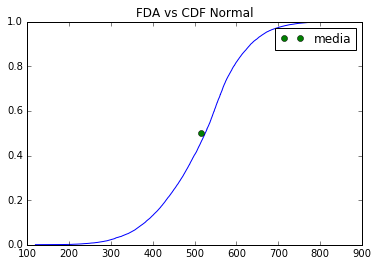

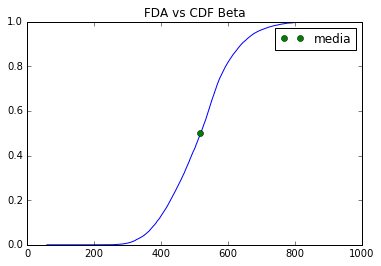

In [14]:
franorm = q_norm
frabeta = q_beta

Beta = beta.fit(Enem.NotaRed)
Normal = norm.fit(Enem.NotaRed) 

cdfnorm = norm.cdf(tempos,  Normal[0],  Normal[1])
cdfbeta = beta.cdf(tempos, Beta[0], Beta[1], Beta[2], Beta[3])

plt.title("FDA vs CDF Normal")
plt.plot(franorm, cdfnorm)
plt.plot(515, 0.5, "o", label='media')
plt.legend()
plt.show()
plt.title("FDA vs CDF Beta")
plt.plot(frabeta, cdfbeta)
plt.plot(515, 0.5, "o", label='media')
plt.legend()
plt.show()

### Itens 10 e 11 - Resolução:

###### 1. Testes de aderência que usam a diferença entre quantis

In [15]:
q_norm[0] = 0
erro_quadratico_Norm = sum((tempos - q_norm)**2)
erro_quadratico_Beta = sum((tempos - q_beta)**2)

print("Erro quadrático da Norm :{:4.3f}".format(erro_quadratico_Norm))
print("Erro quadrático da Beta :{:4.3f}".format(erro_quadratico_Beta))
print()
print("Erro quadrático % da Norm :{:4.3f}".format(erro_quadratico_Norm/sum(tempos)))
print("Erro quadrático % da Beta :{:4.3f}".format(erro_quadratico_Beta/sum(tempos)))

Erro quadrático da Norm :900082.555
Erro quadrático da Beta :315427.795

Erro quadrático % da Norm :0.112
Erro quadrático % da Beta :0.039


In [16]:
eqm_Norm = erro_quadratico_Norm/len(tempos)
eqm_Beta = erro_quadratico_Beta/len(tempos)

print("Erro quadratico médio da Normal :", eqm_Norm)
print("Erro quadratico médio da Beta :", eqm_Beta)

Erro quadratico médio da Normal : 57.5500354807
Erro quadratico médio da Beta : 20.168017571


In [17]:
soma_diferenças_Norm = sum(abs(tempos - q_norm))
soma_diferenças_Beta = sum(abs(tempos - q_beta))

print("Soma de diferenças da Normal :", soma_diferenças_Norm)
print("Soma de diferenças da Beta :", soma_diferenças_Beta)
print()
print("Soma de diferenças % da Normal :", soma_diferenças_Norm/sum(tempos))
print("Soma de diferenças % da Beta :", soma_diferenças_Beta/sum(tempos))

Soma de diferenças da Normal : 100823.528637
Soma de diferenças da Beta : 60687.5232443

Soma de diferenças % da Normal : 0.0125077513229
Soma de diferenças % da Beta : 0.00752864395247


###### 2. Testes de aderência que usam a cumulativa

Comparação FRA FDA 

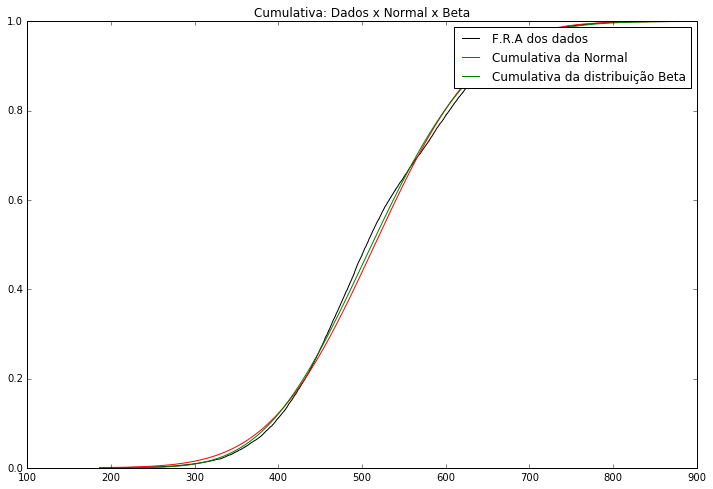

In [18]:
# fra e FDA
cdf_Norm = norm.cdf(tempos,  Normal[0],  Normal[1])
cdf_Beta = beta.cdf(tempos, Beta[0], Beta[1], Beta[2], Beta[3])

fig = plt.figure(figsize=(12,8))

plt.title("Cumulativa: Dados x Normal x Beta")

dados_fra_plot, = plt.plot(tempos, fra, '-', color='black', label="F.R.A dos dados")
cdf_norm_plot,   = plt.plot(tempos, cdf_Norm, '-', color='red', label = "Cumulativa da Normal")
cdf_beta_plot, = plt.plot(tempos, cdf_Beta, '-', color='green', label = "Cumulativa da distribuição Beta")

plt.legend(handles=[dados_fra_plot, cdf_norm_plot, cdf_beta_plot])

In [19]:
erro_quad_cdf_Norm = sum((fra - cdf_Norm)**2)
erro_quad_cdf_Beta = sum((fra - cdf_Beta)**2)

print("Erro quadrático da CDF da Normal versus F.R.A", erro_quad_cdf_Norm)
print("Erro quadrático da CDF da Beta versus F.R.A", erro_quad_cdf_Beta)
print()
print("Erro quadrático da CDF da Normal em % versus F.R.A", erro_quad_cdf_Norm/sum(fra))
print("Erro quadrático da CDF da Beta em % versus F.R.A", erro_quad_cdf_Beta/sum(fra))

Erro quadrático da CDF da Normal versus F.R.A 6.90935362749
Erro quadrático da CDF da Beta versus F.R.A 2.66544052735

Erro quadrático da CDF da Normal em % versus F.R.A 0.000883662053873
Erro quadrático da CDF da Beta em % versus F.R.A 0.000340892763326


In [20]:
ks_aderencia_Norm = max(abs(fra-cdf_Norm))
ks_aderencia_Beta = max(abs(fra-cdf_Beta))


print("Teste K-S para a Normal: {0}\n\
Teste K-S para a Beta: {1}".format(ks_aderencia_Norm, ks_aderencia_Beta))

Teste K-S para a Normal: 0.04122316044256236
Teste K-S para a Beta: 0.026179418827789014


###### Resultados:

In [21]:
Norm = {"Erro quadrático %    ":erro_quadratico_Norm/sum(tempos), "Erro quadratico médio":eqm_Norm, "Soma de diferenças % ": soma_diferenças_Norm/sum(tempos),"Erro quadratico cdf  ":erro_quad_cdf_Norm, "Teste K-S            ":ks_aderencia_Norm}
Beta = {"Erro quadrático %    ":erro_quadratico_Beta/sum(tempos), "Erro quadratico médio":eqm_Beta, "Soma de diferenças % ": soma_diferenças_Beta/sum(tempos), "Erro quadratico cdf  ":erro_quad_cdf_Beta, "Teste K-S            ":ks_aderencia_Beta}

print("Variavel             ", "Normal ", "Beta")
for i in Norm:
    print(i,":", round(Norm[i],4), round(Beta[i], 4))

Variavel              Normal  Beta
Erro quadratico cdf   : 6.9094 2.6654
Teste K-S             : 0.0412 0.0262
Soma de diferenças %  : 0.0125 0.0075
Erro quadrático %     : 0.1117 0.0391
Erro quadratico médio : 57.55 20.168
